In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'

In [8]:
def efficiency(trained_dend,detected_assemblies,total_dend = 12, total_assemblies = 8):
    if detected_assemblies > trained_dend or trained_dend == 0:
         return 0
    else:
        return 100*(detected_assemblies/trained_dend) * (detected_assemblies/total_assemblies)
    
    
assembly_range = np.arange(1,9,1)
dend_range = np.arange(0,13,1)

eff = np.zeros((len(assembly_range),len(dend_range)))
for assembly_detection in assembly_range:
    for dend_training in dend_range:
        eff[assembly_detection-1,dend_training]=efficiency(dend_training,assembly_detection)     

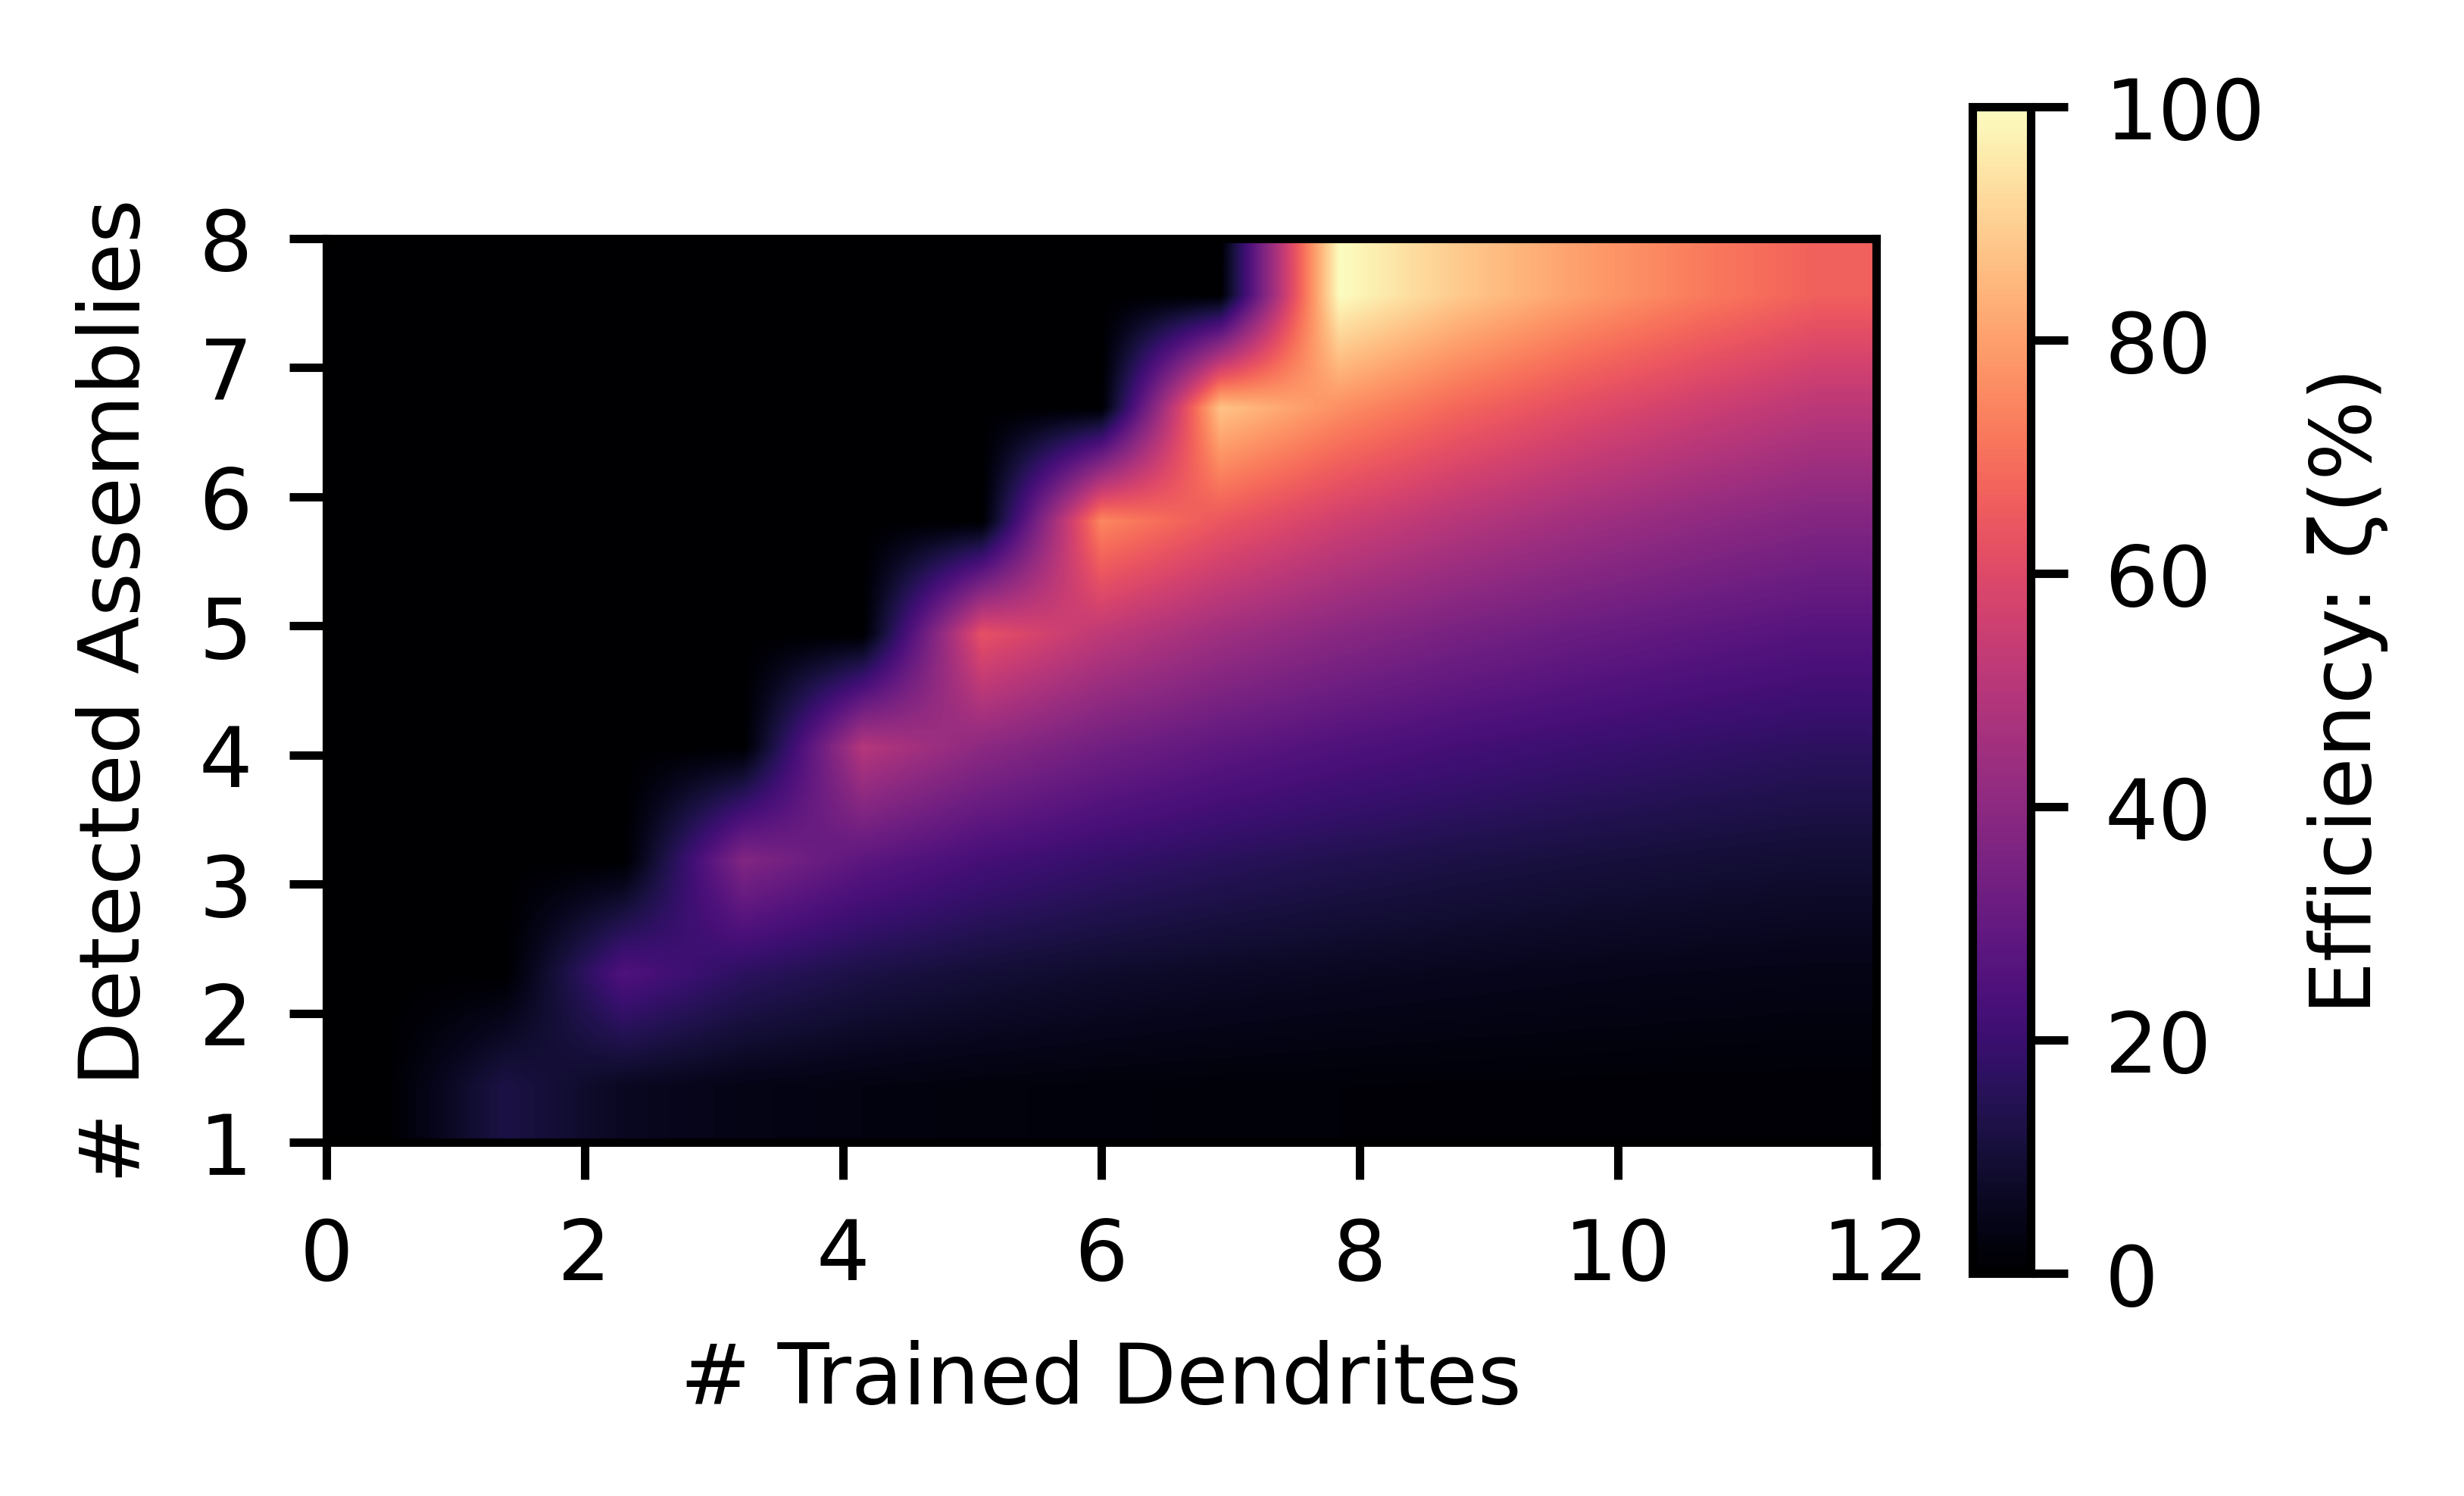

In [9]:
X,Y = np.meshgrid(dend_range,assembly_range )

# Plot using imshow
fig, ax = plt.subplots(figsize=(3.3, 2.0), dpi=1000)
plt.imshow(eff, extent=[ 0, 12,1,8], origin='lower', cmap='magma', interpolation='bilinear')
# plt.plot([0, 8], [0, 8], color='white', linestyle='--', label='Diagonal')
plt.yticks(np.arange(1,9,1))
plt.colorbar(label='Efficiency: \u03B6(%)',)
plt.xlabel('# Trained Dendrites')
plt.ylabel('# Detected Assemblies')
# plt.show()
fig.savefig("Figures/pdf/eff_schematic.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/eff_schematic.svg", format='svg',bbox_inches='tight')